In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

# Поиск лучшего порога по максимуму F1-score:

Этот метод ищет порог, который максимизирует F1-score. F1-score является гармоническим средним precision и recall, что делает его хорошим балансом между ними.

In [13]:
def find_best_threshold_f1(y_true, y_scores):
    """
    Находит оптимальный порог по максимуму F1-score.
    
    Args:
    y_true: Массив истинных меток (0 или 1).
    y_scores: Массив вероятностей принадлежности к положительному классу.
    
    Returns:
    Оптимальный порог и максимальное значение F1-score.
    """
    thresholds = np.linspace(0, 1, 100) # 100 точек между 0 и 1
    best_f1 = 0
    best_threshold = 0

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    return best_threshold, best_f1


# Пример использования:
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1])
y_scores = np.array([0.1, 0.8, 0.9, 0.2, 0.7, 0.3, 0.1, 0.95])

best_threshold, best_f1 = find_best_threshold_f1(y_true, y_scores)

print(f"Лучший порог (по F1-score): {best_threshold:.2f}")
print(f"Максимальное значение F1-score: {best_f1:.2f}")

Лучший порог (по F1-score): 0.30
Максимальное значение F1-score: 1.00


# Поиск лучшего порога по кривой Precision-Recall:

Этот метод использует кривую Precision-Recall (PR-кривая) и ищет порог, соответствующий точке на кривой с наибольшим значением F1-score.

In [14]:
def find_best_threshold_pr(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    fscores = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscores)
    best_threshold = thresholds[ix]
    best_f1 = fscores[ix]
    
    return best_threshold, best_f1

# Пример использования (те же данные, что и выше):
best_threshold, best_f1 = find_best_threshold_pr(y_true, y_scores)

print(f"Лучший порог (по PR-кривой): {best_threshold:.2f}")
print(f"Максимальное значение F1-score: {best_f1:.2f}")

Лучший порог (по PR-кривой): 0.70
Максимальное значение F1-score: 1.00


# Использование threshold в sklearn.metrics.precision_recall_fscore_support:

Этот метод вычисляет precision, recall и F1-score для различных порогов, заданных пользователем. Это позволяет проанализировать поведение метрик при изменении порога.

In [11]:
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1])
y_scores = np.array([0.1, 0.8, 0.9, 0.2, 0.7, 0.3, 0.1, 0.95])
thresholds = [0.5, 0.6, 0.7, 0.8] #Примеры порогов

for threshold in thresholds:
  y_pred = (y_scores >= threshold).astype(int)
  precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'binary')
  print(f"Порог: {threshold:.1f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Порог: 0.5, Precision: 1.00, Recall: 1.00, F1-score: 1.00
Порог: 0.6, Precision: 1.00, Recall: 1.00, F1-score: 1.00
Порог: 0.7, Precision: 1.00, Recall: 1.00, F1-score: 1.00
Порог: 0.8, Precision: 1.00, Recall: 0.75, F1-score: 0.86


Выбор метода:

• Если вам нужен простой и эффективный способ найти лучший порог, используйте первый метод (по максимуму F1-score).

• Если вам нужна визуализация PR-кривой и более детальный анализ, используйте второй метод.

• Если вам нужно посчитать метрики для конкретных порогов, используйте третий метод.

# График Precision-Recall, точка с максимальным F1-score и соответствующим порогом

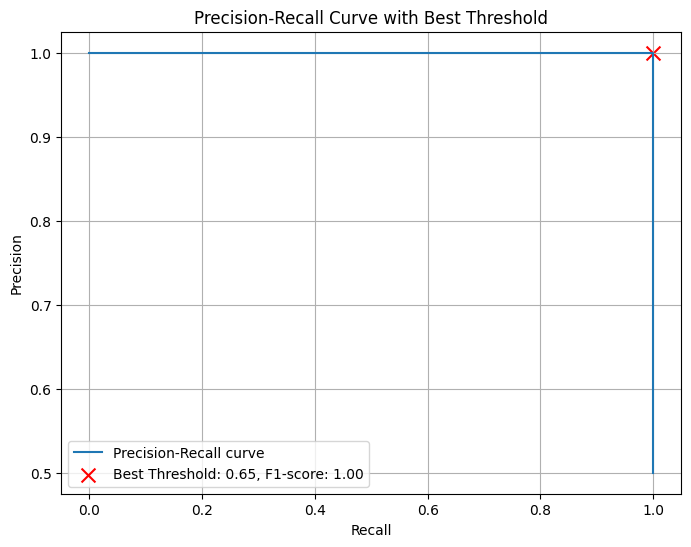

In [15]:
def plot_pr_curve_with_best_threshold(y_true, y_scores):
    """
    Строит Precision-Recall кривую и отмечает точку с максимальным F1-score.
    
    Args:
    y_true: Массив истинных меток (0 или 1).
    y_scores: Массив вероятностей принадлежности к положительному классу.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    fscores = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscores)
    best_threshold = thresholds[ix]
    best_f1 = fscores[ix]

    plt.figure(figsize = (8, 6))
    
    plt.plot(recall, precision, label = 'Precision-Recall curve')
    plt.scatter(
                recall[ix], 
                precision[ix], 
                marker = 'x', 
                color = 'red', 
                s = 100,
                label = f'Best Threshold: {best_threshold:.2f}, F1-score: {best_f1:.2f}'
               )
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve with Best Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()


# Пример использования:
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.8, 0.9, 0.2, 0.7, 0.3, 0.1, 0.95, 0.65, 0.4])

plot_pr_curve_with_best_threshold(y_true, y_scores)

# Визуализировать распределений вероятностей двух классов и влияние изменения порога классификации

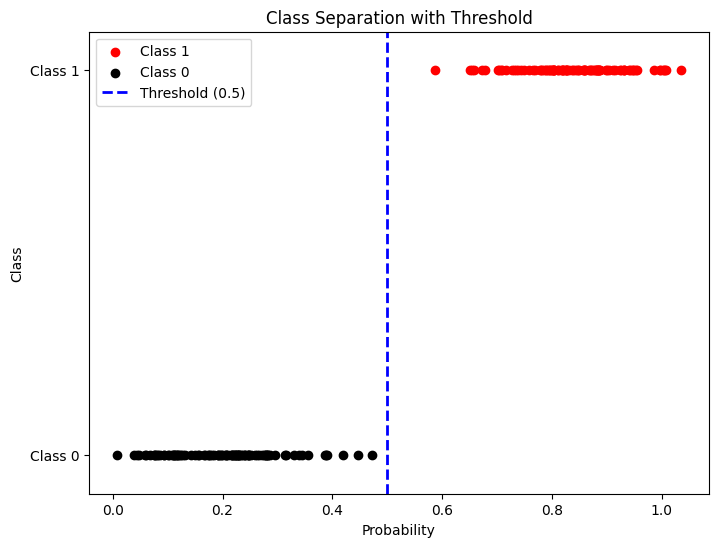

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных (замените на ваши данные)
np.random.seed(42) # Для воспроизводимости
n_samples = 100
class_1_probabilities = np.random.normal(loc = 0.85, scale =0.1, size = n_samples) #вероятности класса 1
class_2_probabilities = np.random.normal(loc = 0.2, scale = 0.1, size = n_samples) #вероятности класса 2
class_1_2 = np.concatenate([class_1_probabilities, class_2_probabilities]) #классы
class_labels = np.concatenate([np.ones(n_samples), np.zeros(n_samples)]) #метки классов

# Создаем график
fig, ax = plt.subplots(figsize = (8, 6))

# Разделяем данные по классам
class_1_indices = np.where(class_labels == 1)[0]
class_2_indices = np.where(class_labels == 0)[0]

# Строим точки для каждого класса
ax.scatter(
           class_1_2[class_1_indices], 
           [1] * len(class_1_indices), 
           color = 'red', 
           label = 'Class 1'
          )

ax.scatter(
           class_1_2[class_2_indices], 
           [0] * len(class_2_indices), 
           color = 'black', 
           label = 'Class 0'
          )

# Добавляем ось порога
ax.axvline(
           x = 0.5, 
           color = 'blue', 
           linestyle = '--', 
           linewidth = 2, 
           label = 'Threshold (0.5)'
          ) #Пример порога 0.5

# Добавляем подписи и легенду
ax.set_xlabel('Probability')
ax.set_ylabel('Class')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Class 0', 'Class 1'])
ax.set_ylim(-0.1, 1.1)
ax.set_title('Class Separation with Threshold')
ax.legend()
plt.show()

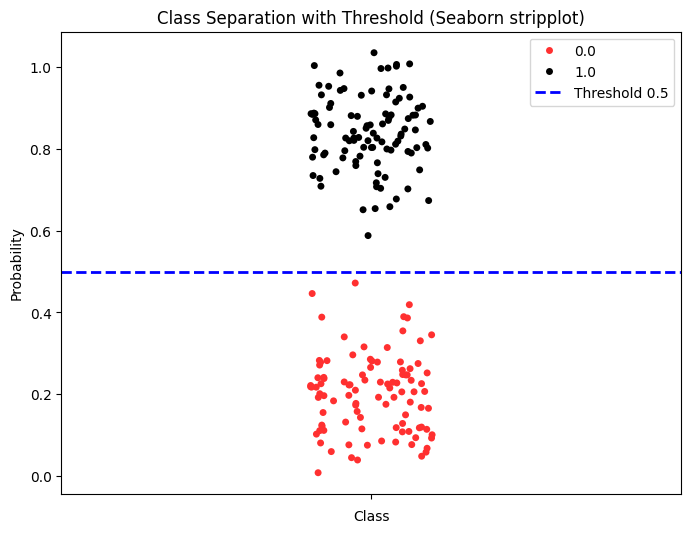

In [38]:
# Пример данных (замените на ваши данные)
np.random.seed(42)
n_samples = 100
class_1_probabilities = np.random.normal(loc=0.85, scale=0.1, size=n_samples)
class_2_probabilities = np.random.normal(loc=0.2, scale=0.1, size=n_samples)

threshold = 0.5

# Объединяем данные и добавляем метки класса
probabilities = np.concatenate([class_1_probabilities, class_2_probabilities])
classes = np.concatenate([np.ones(n_samples), np.zeros(n_samples)])

# Создаем DataFrame для Seaborn
data = {'Probability': probabilities, 'Class': classes}
df = pd.DataFrame(data)

# Строим stripplot с разделением по классам
color = ['#FF3030', '#000000']
plt.figure(figsize=(8, 6))
sns.stripplot(y = 'Probability', 
              data = df, 
              jitter = True, 
              hue = 'Class', 
              palette = color
             )

# Добавляем линию порога
plt.axhline(y = threshold, 
            color = 'blue', 
            linestyle = '--', 
            linewidth = 2, 
            label = f'Threshold {threshold}'
           )

# Добавляем подписи и легенду
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Class Separation with Threshold (Seaborn stripplot)')
plt.legend()
plt.show()
